## D212 - Data Mining II - PA2

### Background Info:

**You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.**

**_Question: "From information about previous patients who were readmitted, can we ascertain the minimum number of principal variables for our patients?"_**

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data From medical_clean.csv

In [2]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Check for Missing Values

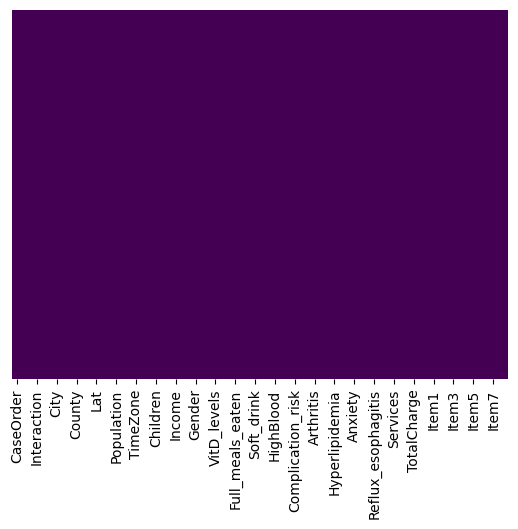

In [4]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [6]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#### Create DataFrame w/Number DataTypes Only

In [7]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [8]:
df.describe(exclude=[np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


#### Create DataFrame w/Categorical DataTypes Only

In [9]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


#### Describe Readmissions

In [10]:
df[['ReAdmis']].describe()

,ReAdmis
count,10000
unique,2
top,No
freq,6331


#### Describe Columns

In [11]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Prep Dummies Data

In [12]:
df_temp = df[['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
              'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', \
              'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', \
              'TotalCharge', 'Additional_charges']]

In [13]:
df_dummies = pd.get_dummies(df_temp, drop_first=True)
df_dummies.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,1,0,0,...,1,0,1,1,1,0,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [14]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Male                          10000 non-null  uint8  
 8   Gender_Nonbinary                     10000 non-null  uint8  
 9   ReAdmis_Yes                          10000 non-null  uint8  
 10  Initial_admin_Emergency Admission    10000 non-null  uint8  
 11  Initial_admin_Observation Adm

In [15]:
df_dummies.columns

Index(['Age', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Gender_Male', 'Gender_Nonbinary',
       'ReAdmis_Yes', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes',
       'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes',
       'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous',
       'Services_MRI'],
      dtype='object')

### Keep Only Necessary Columns

In [16]:
# Start pruning non-relavent features
# Create target and predictor series
pca_df_target = df_dummies['ReAdmis_Yes']
pca_df_pred = df_dummies.drop(['ReAdmis_Yes'], axis=1);
print('-----'*5)
print('ReAdmis_Yes as Target: ' + str(pca_df_target.info()))
print('-----'*5)
print("Predictor Variables: " + str(pca_df_pred.columns))
print('-----'*5)

-------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
ReAdmis_Yes as Target: None
-------------------------
Predictor Variables: Index(['Age', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes',
       'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes',
       'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes',
       'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous',
       'Services_MRI'],
      dtype='object')
-------------------------


In [17]:
pca_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Male                          10000 non-null  uint8  
 8   Gender_Nonbinary                     10000 non-null  uint8  
 9   Initial_admin_Emergency Admission    10000 non-null  uint8  
 10  Initial_admin_Observation Admission  10000 non-null  uint8  
 11  HighBlood_Yes                

In [18]:
pca_df_pred.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,1,0,1,...,1,0,1,1,1,0,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [19]:
print('pca_df_target: ' + str(pca_df_target.shape))
print('------'*5)
print('pca_df_pred: ' + str(pca_df_pred.shape))

pca_df_target: (10000,)
------------------------------
pca_df_pred: (10000, 27)


In [20]:
print('pca_df_target: ' + str(pca_df_target.info()))
print('-------'*10)
print('pca_df_pred: ' + str(pca_df_pred.info()))

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
pca_df_target: None
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   

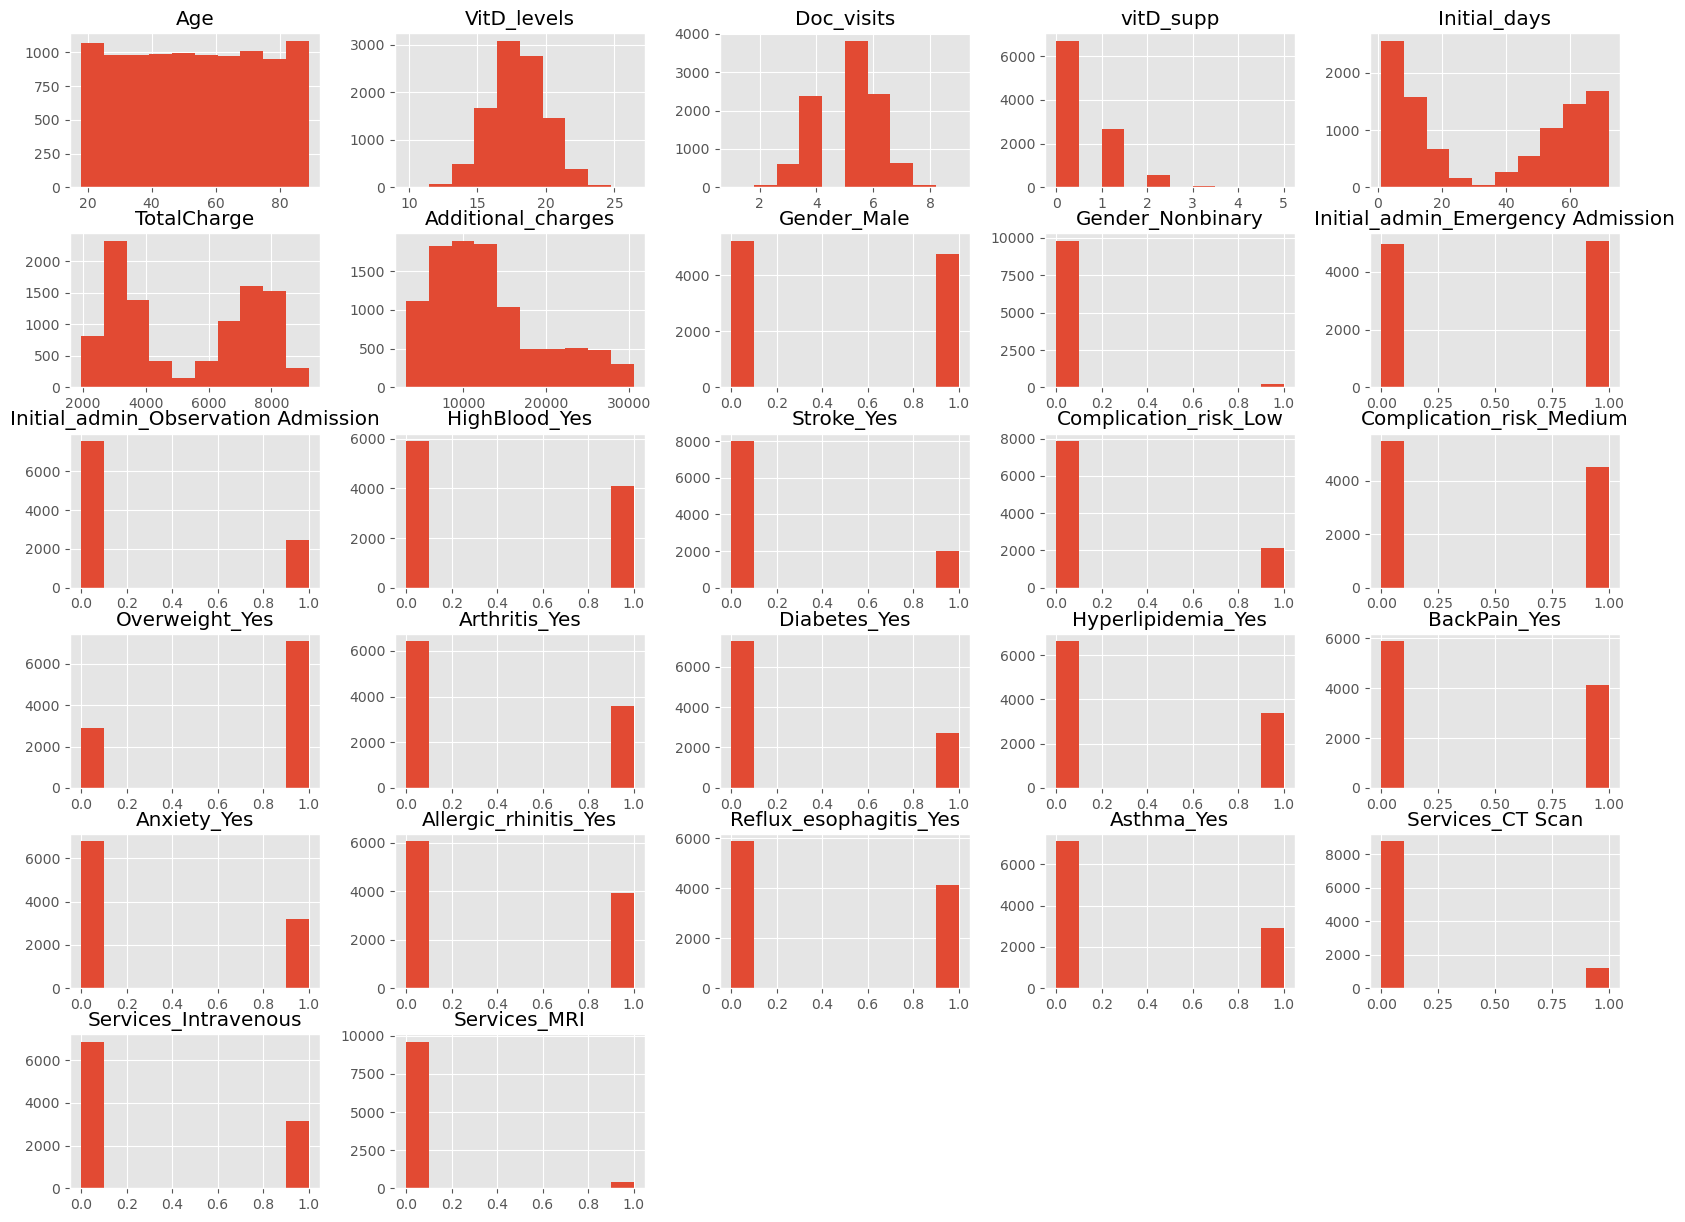

In [21]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
plt.style.use('ggplot')
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = pca_df_pred.values # drop target variable
y = pca_df_target.values
pd.DataFrame.hist(pca_df_pred, figsize = [20,15]);

## Correlation Data and Matrix

### Correlation Matrix of Predictor Values

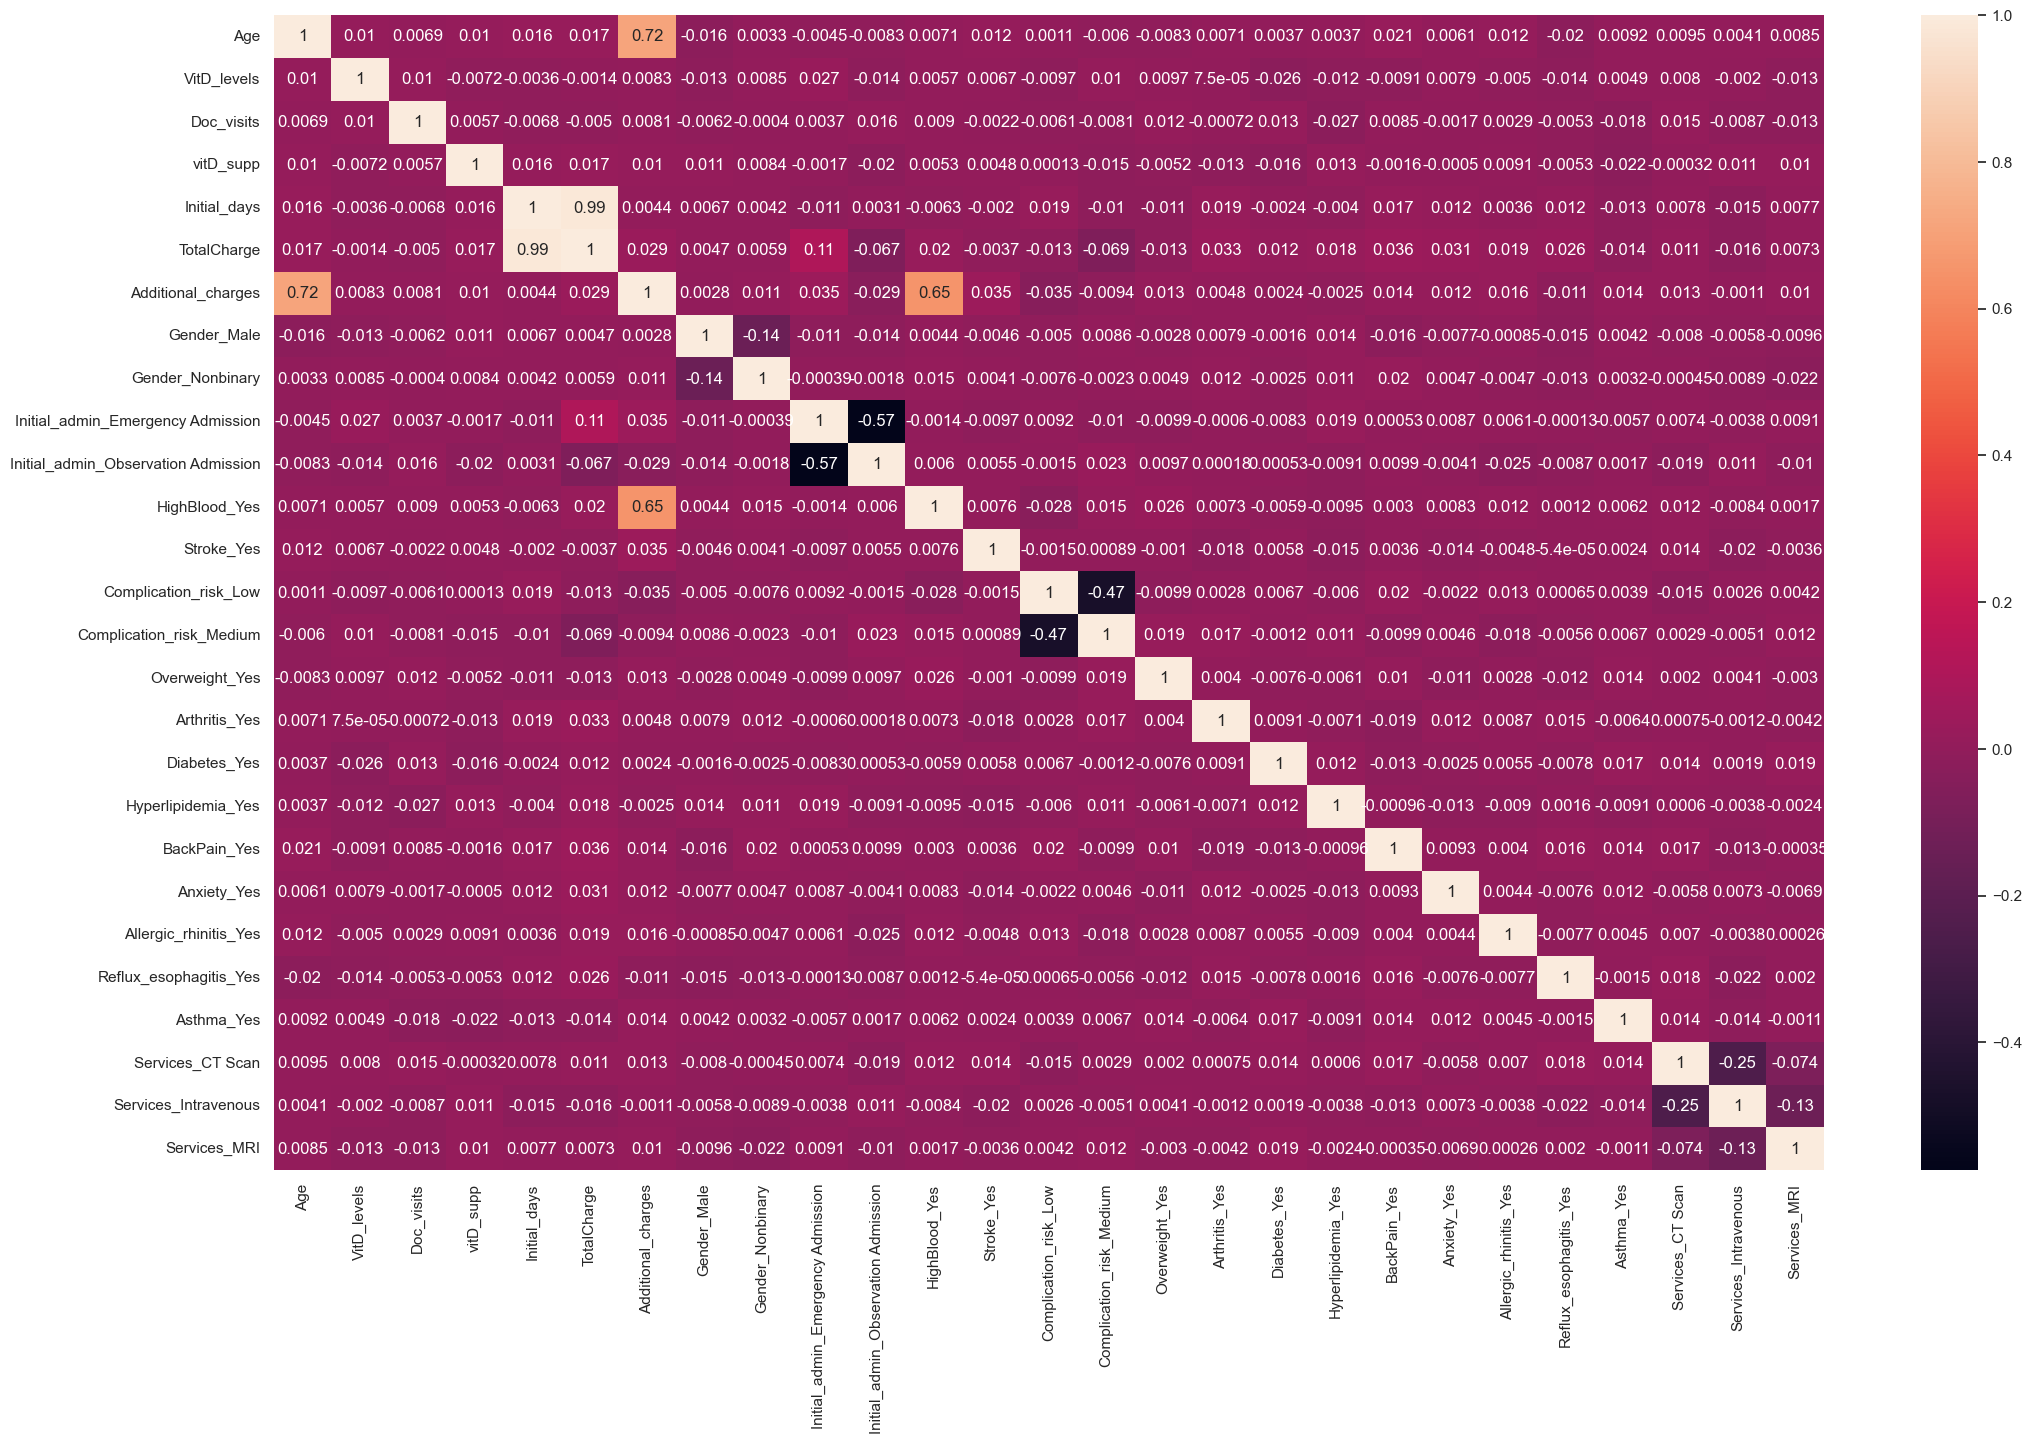

In [22]:
# Correlation of PCA Predictor Values

sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(pca_df_pred.corr(), annot=True);

In [23]:
df_dummies.corr()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
Age,1.000000,0.010315,0.006898,0.010014,0.016264,0.016876,0.716854,-0.016297,0.003265,0.015810,...,0.003694,0.003736,0.021081,0.006130,0.012092,-0.019609,0.009229,0.009506,0.004142,0.008529
VitD_levels,0.010315,1.000000,0.010210,-0.007203,-0.003642,-0.001403,0.008290,-0.013205,0.008457,0.004083,...,-0.025834,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937,0.008048,-0.001984,-0.012840
Doc_visits,0.006898,0.010210,1.000000,0.005681,-0.006754,-0.005043,0.008072,-0.006159,-0.000404,0.000246,...,0.012781,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,0.014600,-0.008700,-0.012822
vitD_supp,0.010014,-0.007203,0.005681,1.000000,0.015974,0.016924,0.010327,0.011164,0.008395,0.011039,...,-0.015768,0.012759,-0.001641,-0.000499,0.009096,-0.005316,-0.021763,-0.000317,0.011475,0.010334
Initial_days,0.016264,-0.003642,-0.006754,0.015974,1.000000,0.987640,0.004409,0.006704,0.004196,0.850862,...,-0.002411,-0.003974,0.017344,0.011908,0.003635,0.012237,-0.013496,0.007786,-0.015430,0.007692
TotalCharge,0.016876,-0.001403,-0.005043,0.016924,0.987640,1.000000,0.029256,0.004748,0.005890,0.843726,...,0.011524,0.017565,0.035828,0.031199,0.018919,0.026284,-0.014290,0.010561,-0.016170,0.007341
Additional_charges,0.716854,0.008290,0.008072,0.010327,0.004409,0.029256,1.000000,0.002757,0.010869,0.013620,...,0.002450,-0.002475,0.014245,0.011666,0.016154,-0.011405,0.014083,0.013137,-0.001095,0.010134
Gender_Male,-0.016297,-0.013205,-0.006159,0.011164,0.006704,0.004748,0.002757,1.000000,-0.141169,0.009813,...,-0.001562,0.014073,-0.015687,-0.007679,-0.000848,-0.015274,0.004247,-0.007988,-0.005779,-0.009617
Gender_Nonbinary,0.003265,0.008457,-0.000404,0.008395,0.004196,0.005890,0.010869,-0.141169,1.000000,0.006428,...,-0.002469,0.011458,0.019604,0.004733,-0.004719,-0.013315,0.003185,-0.000453,-0.008914,-0.022162
ReAdmis_Yes,0.015810,0.004083,0.000246,0.011039,0.850862,0.843726,0.013620,0.009813,0.006428,1.000000,...,-0.003058,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133,0.024395,-0.020313,0.009309


In [24]:
# https://realpython.com/knn-python/
# Correlations with Arbitrary Target?
correlation_matrix = df_dummies.corr()

print(correlation_matrix["ReAdmis_Yes"] > 0.5)

Age                                    False
VitD_levels                            False
Doc_visits                             False
vitD_supp                              False
Initial_days                            True
TotalCharge                             True
Additional_charges                     False
Gender_Male                            False
Gender_Nonbinary                       False
ReAdmis_Yes                             True
Initial_admin_Emergency Admission      False
Initial_admin_Observation Admission    False
HighBlood_Yes                          False
Stroke_Yes                             False
Complication_risk_Low                  False
Complication_risk_Medium               False
Overweight_Yes                         False
Arthritis_Yes                          False
Diabetes_Yes                           False
Hyperlipidemia_Yes                     False
BackPain_Yes                           False
Anxiety_Yes                            False
Allergic_r

In [25]:
# Focused features from correlation matrix

#pruned_df = df_dummies[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

In [26]:
#pruned_df.shape

## Intro to PCA

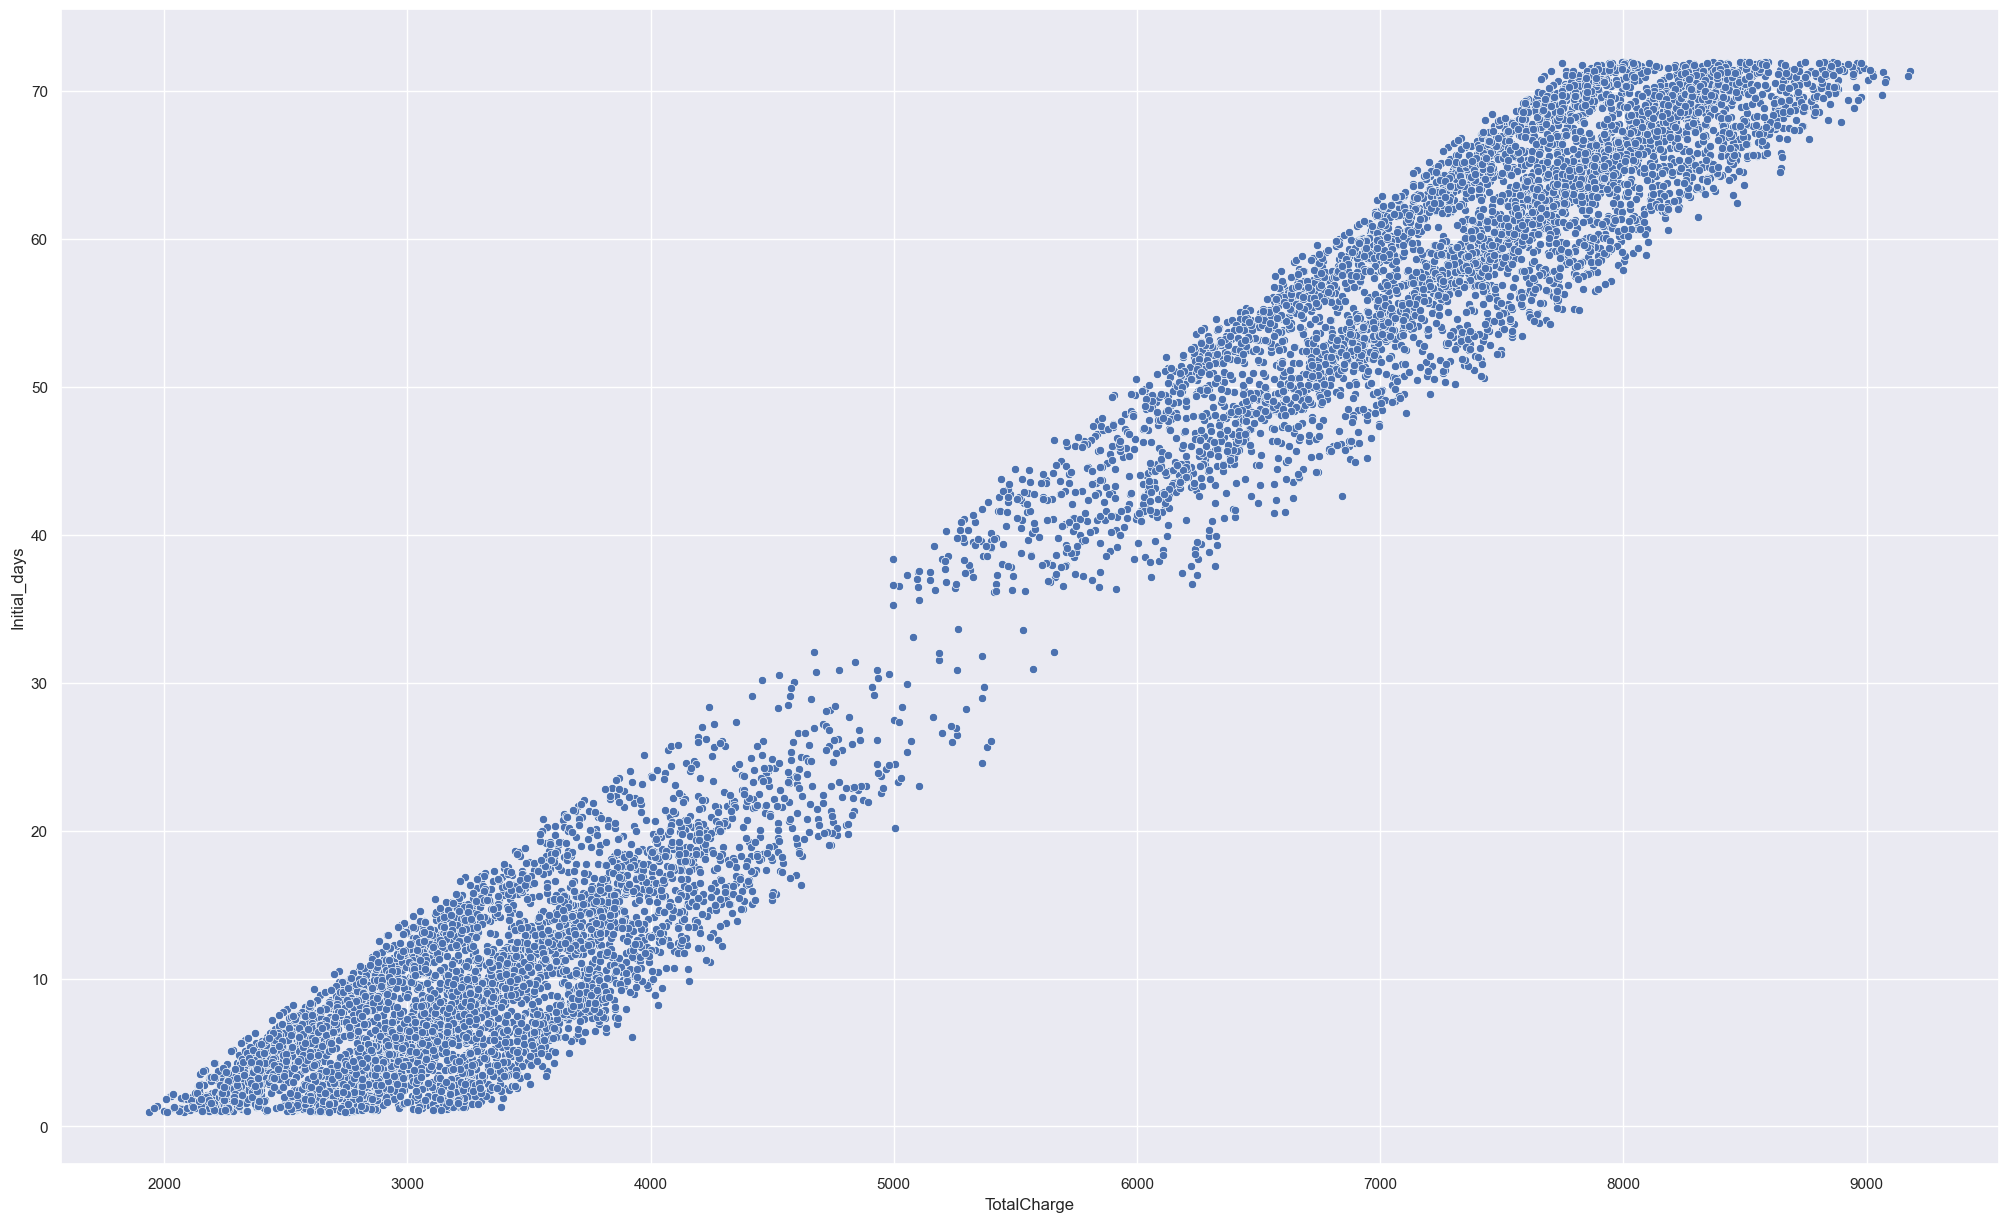

In [27]:
sns.scatterplot(data=df_dummies, x='TotalCharge', y='Initial_days');

In [28]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_dummies), columns = df_dummies.columns)

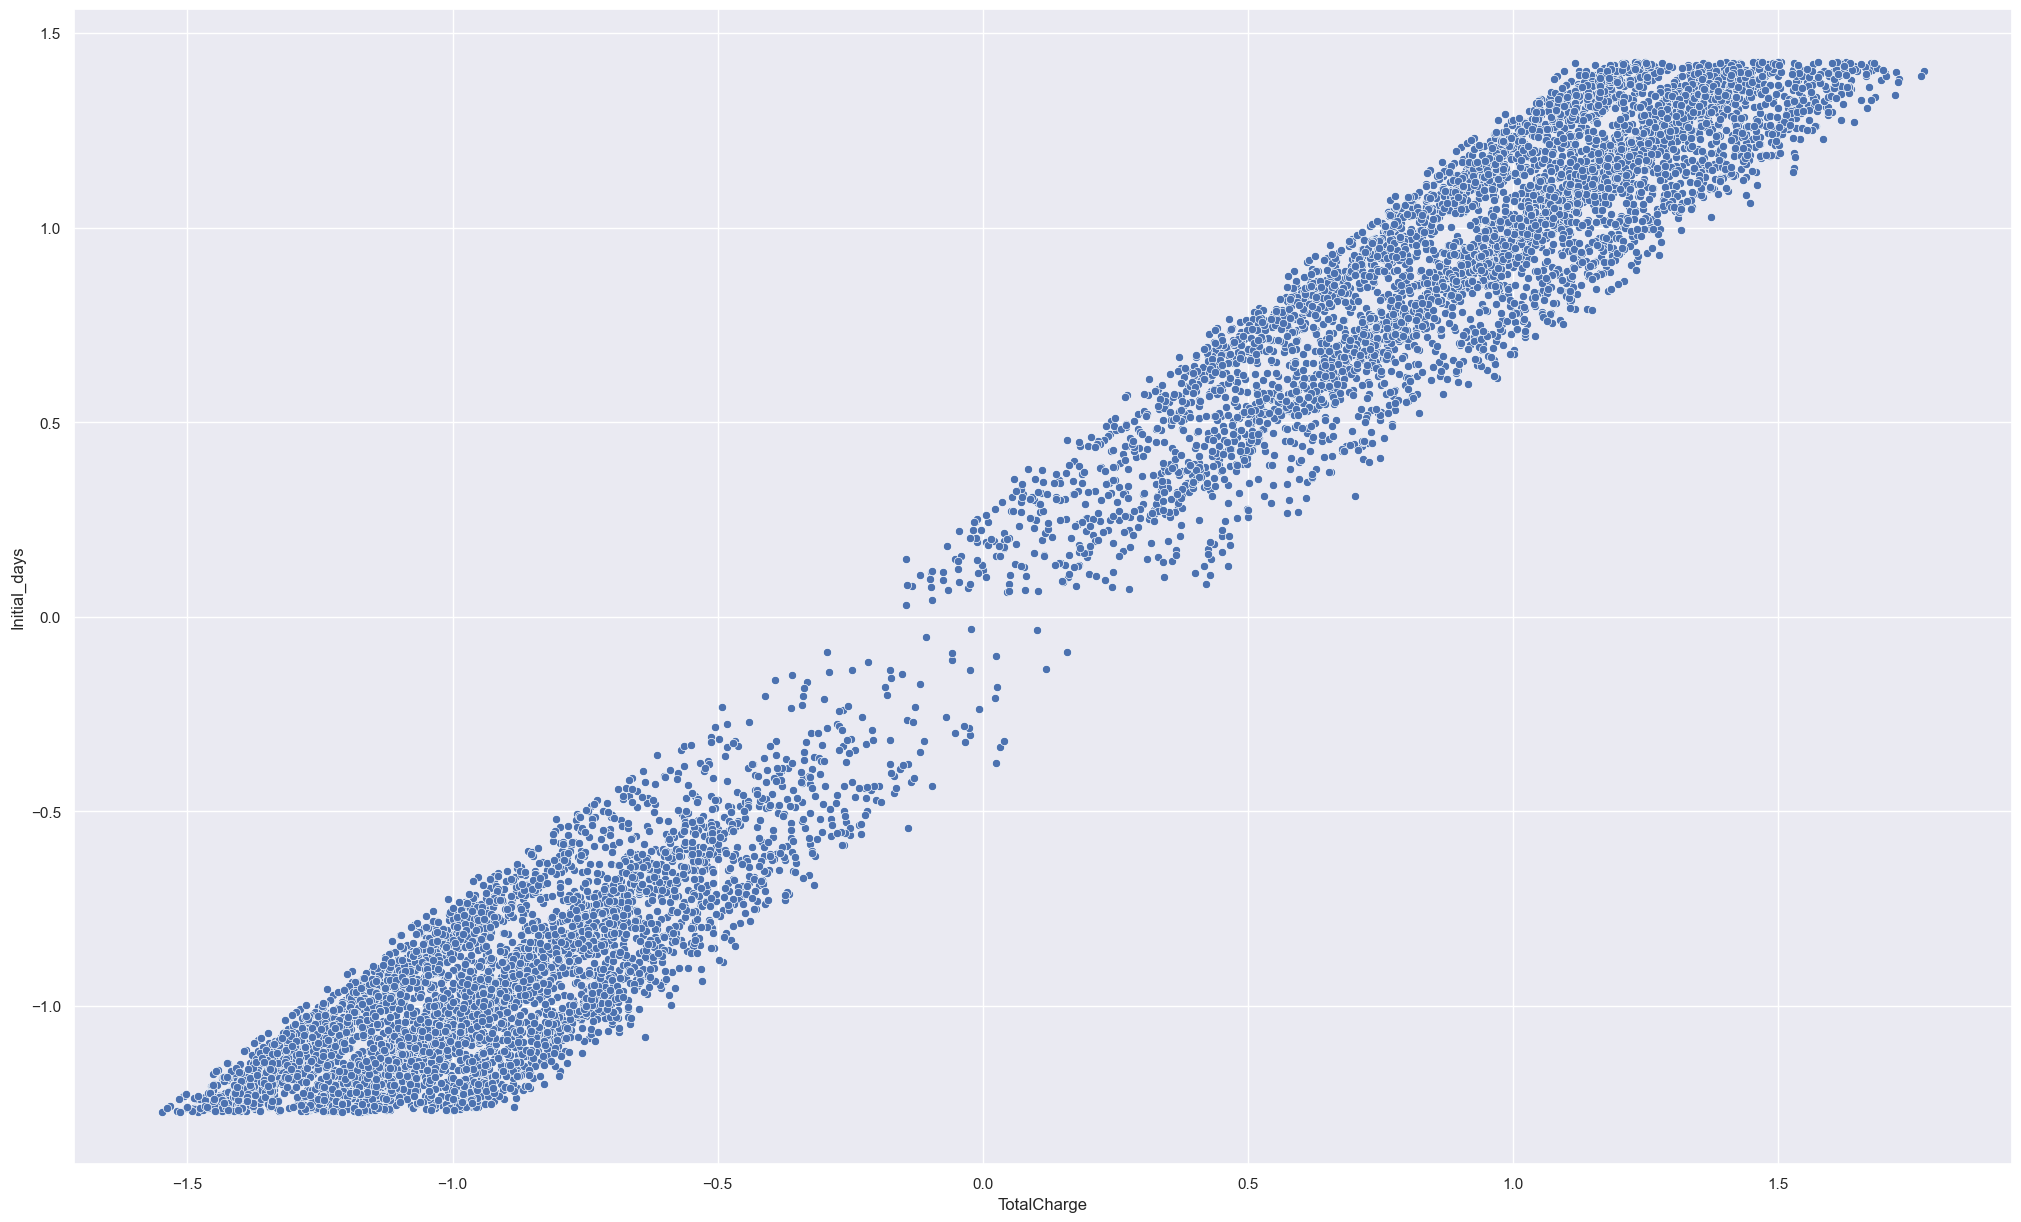

In [29]:
sns.scatterplot(data=df_std, x='TotalCharge', y='Initial_days');

### Calculating Principle Components

In [30]:
# Standardizing Continuous Dataset
scaler = StandardScaler()
std_df = scaler.fit_transform(df_dummies)

pca = PCA()
print(pca.fit_transform(std_df))

[[-1.22345671e+00  1.38470718e+00 -8.99594122e-01 ... -8.02858050e-02
   2.95935943e-02 -4.74066999e-10]
 [-1.07180686e+00  1.05141455e+00 -1.10734035e+00 ...  5.92369348e-02
   5.00476368e-02 -1.58767057e-09]
 [-1.94004422e+00  1.10048864e+00  5.73019886e-01 ... -2.23728403e-01
   2.00594989e-02  3.79674353e-09]
 ...
 [ 2.26175452e+00  4.45697534e-01  4.88310313e-01 ... -8.21186227e-02
   9.77371257e-02  2.67002221e-08]
 [ 1.97986293e+00 -1.19281366e+00 -7.54375873e-01 ... -1.68552210e-01
  -9.31021652e-02  1.12305099e-07]
 [ 2.16046478e+00 -4.67578843e-01  1.54701307e+00 ... -5.68823370e-02
   7.47586277e-02  2.00799114e-07]]


In [31]:
# Note: X and y were set on the ggplot graph above
X = pca_df_pred # drop .value
y = pca_df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Principal Component Explained Variance Ratio

In [32]:
pca.fit(std_df)
print(pca.explained_variance_ratio_)

[1.00118221e-01 7.07693086e-02 5.65669575e-02 5.25829888e-02
 4.52843961e-02 4.10973459e-02 3.83912689e-02 3.73819320e-02
 3.71499909e-02 3.68721612e-02 3.66664449e-02 3.64041305e-02
 3.63028553e-02 3.62048502e-02 3.56723878e-02 3.53076877e-02
 3.47577197e-02 3.44899748e-02 3.43474241e-02 3.37296808e-02
 3.33302010e-02 3.02798083e-02 2.41038248e-02 1.90005142e-02
 1.51483195e-02 6.92287086e-03 1.11673424e-03 2.55980038e-16]


### Export Cleaned and Standardized Dataset

In [33]:
pd.DataFrame(std_df).to_csv('std_df.csv', index=False)

### Correlation Matrix of All Principle Components (Standardized)

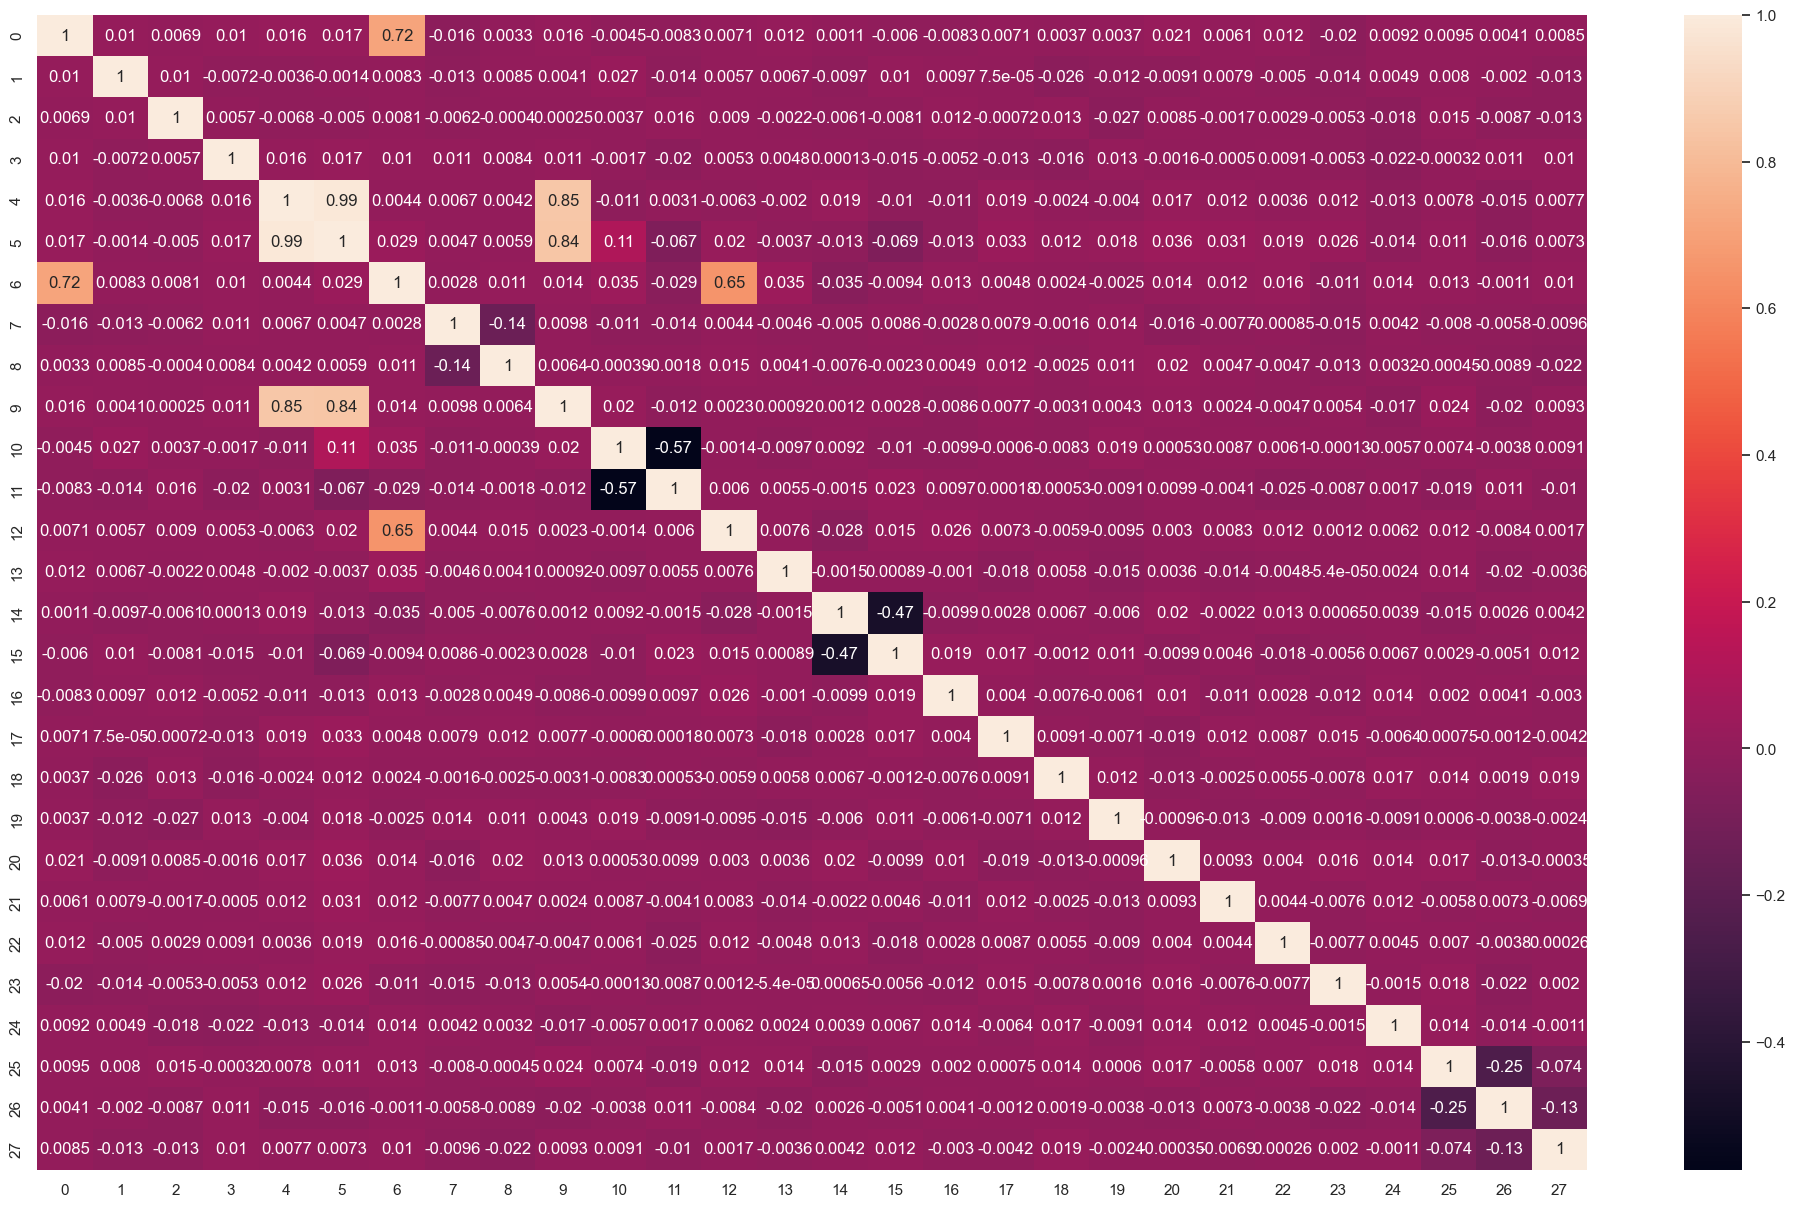

In [34]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(pd.DataFrame(std_df).corr(), annot=True);

In [35]:
print(pca.explained_variance_ratio_.cumsum())

[0.10011822 0.17088753 0.22745449 0.28003748 0.32532187 0.36641922
 0.40481049 0.44219242 0.47934241 0.51621457 0.55288102 0.58928515
 0.625588   0.66179285 0.69746524 0.73277293 0.76753065 0.80202062
 0.83636805 0.87009773 0.90342793 0.93370774 0.95781156 0.97681208
 0.99196039 0.99888327 1.         1.        ]


In [36]:
print(pca.components_)

[[ 3.04575870e-02  5.00336346e-04 -3.31746085e-03  1.51748444e-02
   5.83242471e-01  5.86650185e-01  3.58096885e-02  5.73009813e-03
   5.56203989e-03  5.52181242e-01  5.19919824e-02 -4.28250381e-02
   1.79823753e-02 -1.01369514e-03  9.07304720e-03 -2.83097490e-02
  -1.11070503e-02  1.91858523e-02  1.74716739e-03  6.39558426e-03
   2.21687649e-02  1.53770805e-02  7.87333771e-03  1.45506974e-02
  -1.37897245e-02  1.71131933e-02 -2.00208969e-02  9.17357715e-03]
 [ 5.16596935e-01  1.78835567e-02  1.44967793e-02  1.41977419e-02
  -4.14287377e-02 -2.07425129e-02  7.01130740e-01 -8.01346295e-03
   1.87091310e-02 -3.21820045e-02  4.77168157e-02 -4.88453158e-02
   4.74658866e-01  3.50428608e-02 -4.81547157e-02  2.05756116e-02
   1.93906471e-02  8.15052746e-03  4.19980344e-04 -4.52176252e-03
   2.05610045e-02  1.52595291e-02  2.43011018e-02 -1.88755012e-02
   1.99131851e-02  2.40366360e-02 -1.05552074e-02  1.14013049e-02]
 [ 3.28487784e-02 -3.98450257e-02  1.44563295e-02 -2.21919739e-02
   7.523

### Plotting Standardized Data

In [37]:
# Takes a bit
# sns.pairplot(pd.DataFrame(std_df))
# plt.show()

### PCA in a Pipeline

In [38]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA())])

pc = pipe.fit_transform(pd.DataFrame(std_df))

print(pc[:,:2])

[[-1.22345671  1.38470718]
 [-1.07180686  1.05141455]
 [-1.94004422  1.10048864]
 ...
 [ 2.26175452  0.44569753]
 [ 1.97986293 -1.19281366]
 [ 2.16046478 -0.46757884]]


### PCA In a Model Pipeline

In [39]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=3)),
    ('classifier', RandomForestClassifier())])
print(pipe['reducer'])

PCA(n_components=3)


In [40]:
pipe.fit(X_train, y_train)
pipe['reducer'].explained_variance_ratio_

array([0.07576005, 0.07235497, 0.05732626])

In [41]:
pipe['reducer'].explained_variance_ratio_.sum()

0.20544128485576596

In [42]:
print(pipe.score(X_test, y_test))

0.9566666666666667


### Setting an Explained Variance Threshold

In [43]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))])
# Fit the pipe to the data
pipe.fit(pd.DataFrame(std_df))

print(len(pipe['reducer'].components_))

21


### Optimal Number of Components

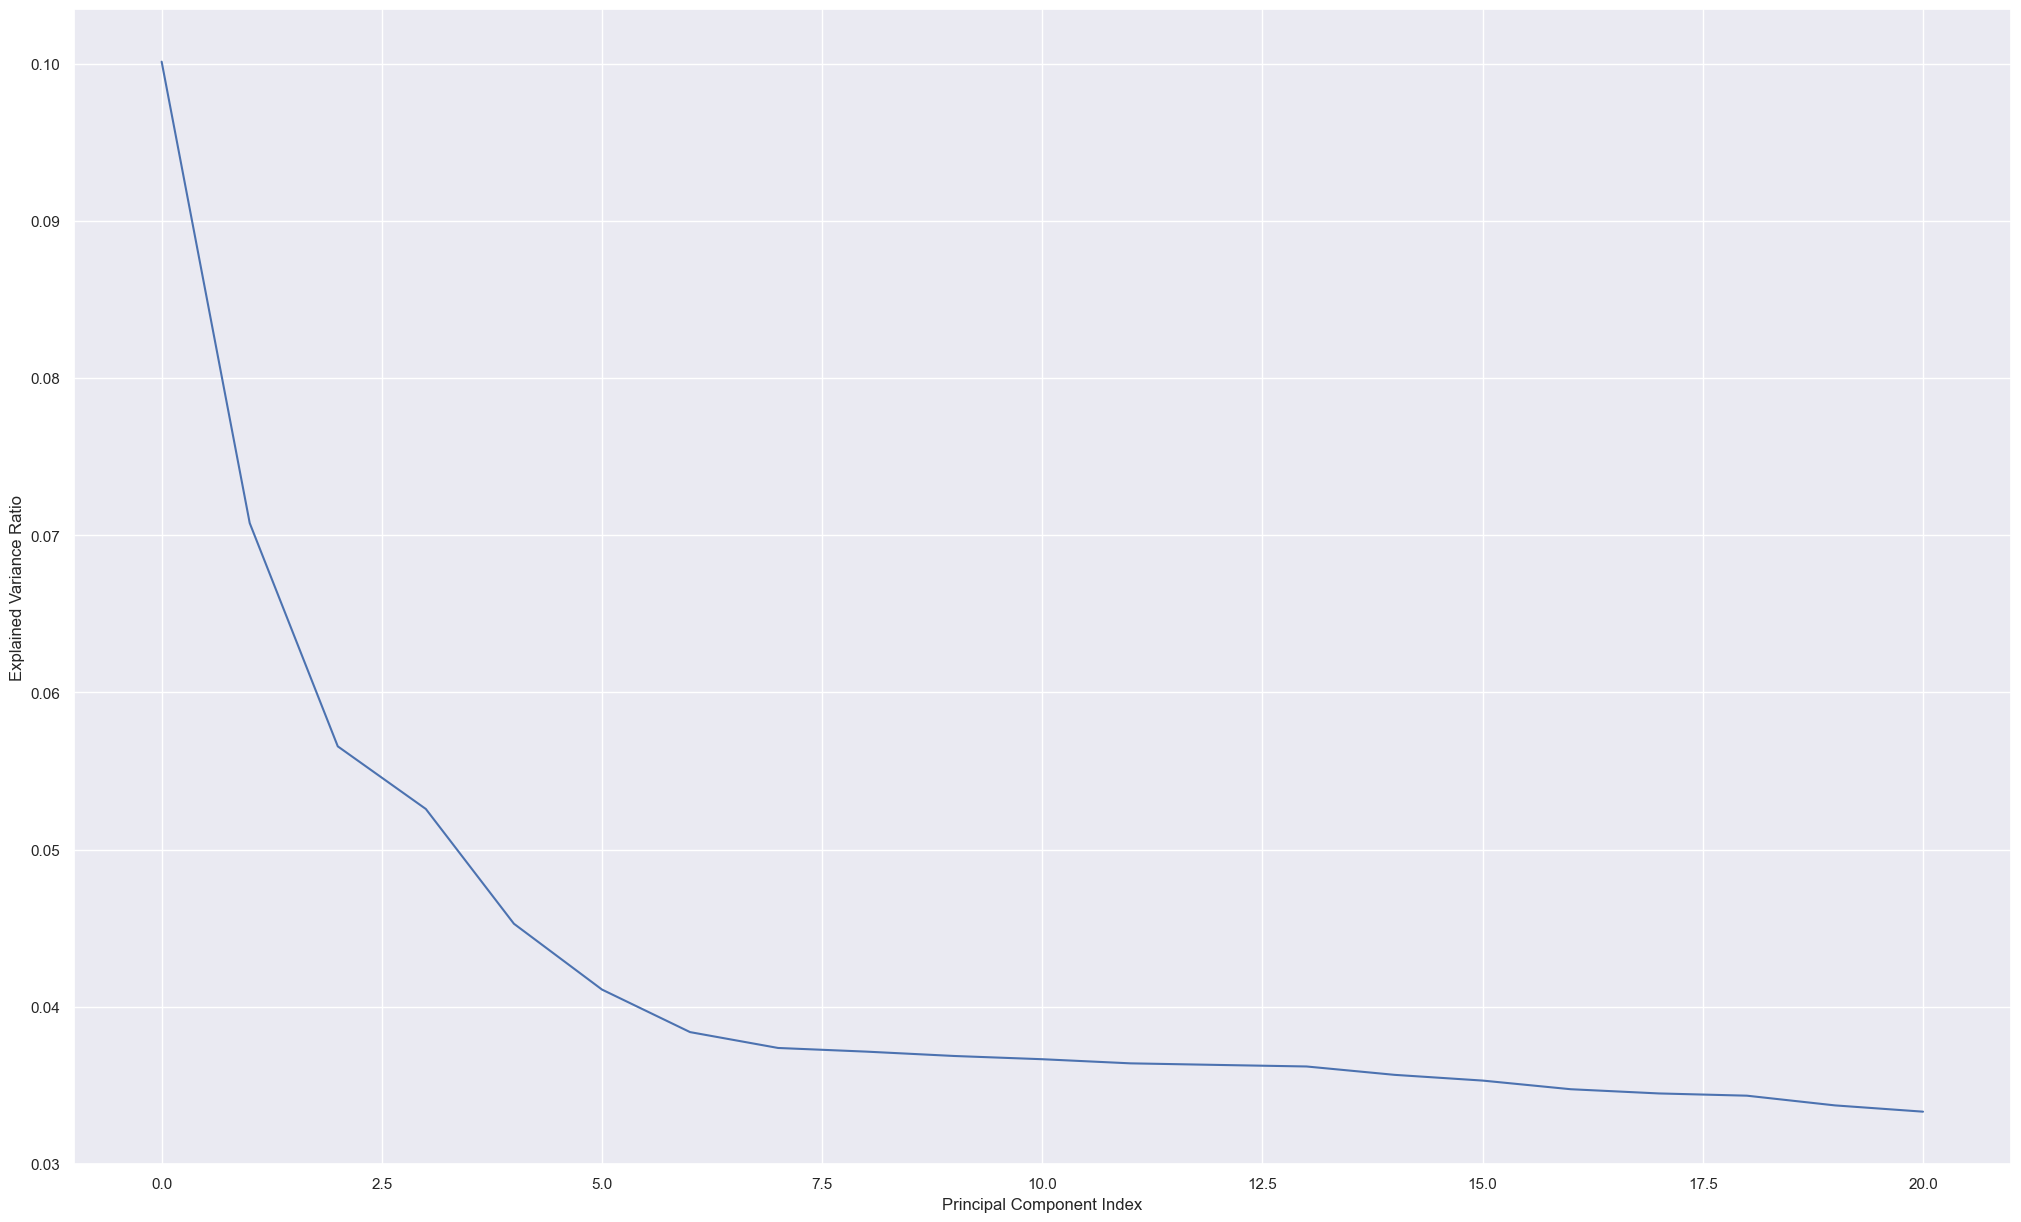

In [44]:
pipe.fit(pd.DataFrame(std_df))

var = pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()